In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

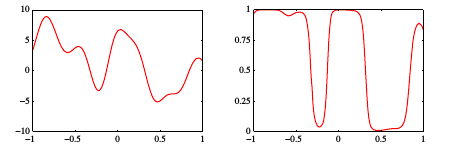

Fig.11 The left plot shows a sample from a Gaussian process prior over functions a(x), and the right plot shows the result of transforming this sample using a logistic sigmoid function.

# Gaussian Processes for Classification

In a probabilistic approach to classification, we aim to model the posterior probabilities of the target variable $ t $ for a new input vector, given a set of training data. The Gaussian Process (GP) model can be adapted for classification by applying a nonlinear activation function (e.g., the logistic sigmoid) to its output. 

---

## The Logistic Sigmoid Transformation

For a two-class problem with target $ t \in \{0, 1\}$, we define a Gaussian process $ a(x) $, and transform its output using a logistic sigmoid:

$$
y = \sigma(a), \quad \sigma(a) = \frac{1}{1 + e^{-a}}
$$

This results in a Bernoulli-distributed target:
$$
p(t|a) = \sigma(a)^t (1 - \sigma(a))^{1-t}
$$

---

## Posterior Distribution

Given training inputs $ x_1, \dots, x_N $ and corresponding targets $ \mathbf{t} = (t_1, \dots, t_N)^\top $, we consider a test point $ x_{N+1} $ with target $ t_{N+1} $. The predictive distribution $ p(t_{N+1} | \mathbf{t}) $ is computed as:

$$
p(t_{N+1} = 1 | \mathbf{t}) = \int \sigma(a_{N+1}) p(a_{N+1} | \mathbf{t}) \, da_{N+1}
$$

This integral is **analytically intractable** and requires approximation.

---

## Gaussian Process Prior

A Gaussian process prior is defined over the latent variables $ \mathbf{a} $:

$$
p(a_{N+1}) = \mathcal{N}(a_{N+1} | 0, C_{N+1})
$$

The covariance matrix $ C_{N+1} $ has elements:

$$
C(x_n, x_m) = k(x_n, x_m) + \nu \delta_{nm}
$$

Here:
- $ k(x_n, x_m) $ is the kernel function.
- $ \nu > 0 $ ensures numerical stability.

---

## Predictive Distribution

For two-class problems, the predictive distribution simplifies:

$$
p(t_{N+1} = 0 | \mathbf{t}) = 1 - p(t_{N+1} = 1 | \mathbf{t})
$$

Approximations for $ p(t_{N+1} = 1 | \mathbf{t}) $:
1. **Sampling Methods**: Monte Carlo sampling approximates the integral.
2. **Analytical Approximations**: Use Gaussian approximations to the posterior $ p(a_{N+1} | \mathbf{t}) $.

---

## Gaussian Approximation Techniques

1. **Variational Inference**: Uses a local variational bound on the logistic sigmoid to approximate the product of sigmoids as a product of Gaussians.
   - Ensures analytic marginalization over $ \mathbf{a} $.
   - Extends to multi-class classification using the softmax function.

2. **Expectation Propagation (EP)**: Provides a Gaussian approximation to the true posterior by iterative updates.
   - Works well for unimodal distributions.

---

## Covariance Matrix Learning

The kernel $ k(x, x') $ is governed by a parameter vector $ \boldsymbol{\theta} $, which is learned from the data by maximizing the marginal likelihood:

$$
p(\mathbf{t} | \boldsymbol{\theta}) = \int p(\mathbf{t} | \mathbf{a}) p(\mathbf{a} | \boldsymbol{\theta}) \, d\mathbf{a}
$$

---

### Illustration of Logistic Sigmoid Transformation

1. **Latent Gaussian Process**:
   A Gaussian process $ a(x) $ defines samples over functions:
   $$
   p(a(x)) = \mathcal{GP}(0, k(x, x'))
   $$

2. **Transformed Output**:
   After applying the logistic sigmoid:
   $$
   y(x) = \sigma(a(x)) \quad \text{with } y \in (0, 1)
   $$

Below is a visualization of these processes:
- **Left**: Samples from a Gaussian process prior over $ a(x) $.
- **Right**: Logistic sigmoid transformation to map $ a(x) $ into probabilities.

## Gaussian Processes for Classification

In this section, we outline the Gaussian Process approach to classification using key equations.

## Key Equations

The probabilistic model for classification is built using the following formulations:

### 1. Bernoulli Likelihood
$$
p(t | a) = \sigma(a)^t (1 - \sigma(a))^{1 - t}
$$

where $ \sigma(a) $ is the logistic sigmoid function:

$$
\sigma(a) = \frac{1}{1 + e^{-a}}
$$

### 2. Gaussian Process Prior
A Gaussian process prior is defined over the latent variables:

$$
p(a_{N+1}) = \mathcal{N}(a_{N+1} | 0, C_{N+1})
$$

### 3. Covariance Matrix
The covariance matrix $ C_{N+1} $ is constructed as:

$$
C(x_n, x_m) = k(x_n, x_m) + \nu \delta_{nm}
$$
Here, $ k(x_n, x_m) $ is a kernel function, and $ \nu > 0 $ is a small positive constant for numerical stability.

### 4. Predictive Distribution
The predictive distribution for a new test point is given by:
$$
p(t_{N+1} = 1 | \mathbf{t}) = \int \sigma(a_{N+1}) p(a_{N+1} | \mathbf{t}) \, da_{N+1}
$$

---

## Approximations for $ p(t_{N+1} = 1 | \mathbf{t}) $

Since the integral above is analytically intractable, approximations such as sampling, variational inference, or expectation propagation are used to estimate the predictive probabilities.





In [1]:
import math
import numpy as np

# Step 1: Sigmoid Function for Classification
def sigmoid(x):
    """Sigmoid function for transforming the Gaussian process output to probabilities."""
    return 1 / (1 + np.exp(-x))

# Step 2: Covariance Function (Kernel)
def rbf_kernel(x1, x2, length_scale=1.0):
    """Radial Basis Function kernel (Gaussian kernel)."""
    return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * length_scale**2))

# Step 3: Compute Covariance Matrix
def compute_covariance_matrix(X, nu=1e-5, length_scale=1.0):
    """Compute the covariance matrix for a set of input data X."""
    N = len(X)
    C = np.zeros((N, N))  # Initialize covariance matrix
    for i in range(N):
        for j in range(N):
            C[i, j] = rbf_kernel(X[i], X[j], length_scale)
    # Adding a noise term (nu) for numerical stability
    C += nu * np.eye(N)
    return C

# Step 4: Compute Posterior
def compute_posterior(X_train, t_train, X_test, length_scale=1.0, nu=1e-5):
    """Compute the posterior mean and covariance for new test points."""
    # Compute covariance matrix for training data
    C_train = compute_covariance_matrix(X_train, nu, length_scale)
    # Compute cross-covariance between training data and test points
    C_cross = np.array([[rbf_kernel(x1, x2, length_scale) for x1 in X_train] for x2 in X_test])
    # Compute the covariance matrix for test points
    C_test = compute_covariance_matrix(X_test, nu, length_scale)
    
    # Compute the inverse of the training covariance matrix
    C_train_inv = np.linalg.inv(C_train)
    
    # Compute the posterior mean and covariance
    mean = C_cross @ C_train_inv @ t_train
    covariance = C_test - C_cross @ C_train_inv @ C_cross.T
    
    return mean, covariance

# Step 5: Make Predictions
def predict(X_train, t_train, X_test, length_scale=1.0, nu=1e-5):
    """Make predictions for test points based on the training data."""
    mean, covariance = compute_posterior(X_train, t_train, X_test, length_scale, nu)
    
    # Use the sigmoid function to transform the latent function to probabilities
    probabilities = sigmoid(mean)
    
    return probabilities

# Step 6: Example to Train and Predict
if __name__ == "__main__":
    # Example training data (one-dimensional for simplicity)
    X_train = np.array([[1.0], [2.0], [3.0]])  # Input data
    t_train = np.array([0, 1, 0])  # Targets (binary: 0 or 1)
    
    # Example test data
    X_test = np.array([[1.5], [2.5]])
    
    # Make predictions
    probabilities = predict(X_train, t_train, X_test)
    
    # Output the predicted probabilities for class 1
    print("Predicted probabilities for test points:", probabilities)


Predicted probabilities for test points: [0.6626426 0.6626426]


In [ ]:
import math

# Step 1: Sigmoid Function for Classification
def sigmoid(x):
    """Sigmoid function for transforming the Gaussian process output to probabilities."""
    return 1 / (1 + math.exp(-x))

# Step 2: Covariance Function (Kernel)
def rbf_kernel(x1, x2, length_scale=1.0):
    """Radial Basis Function kernel (Gaussian kernel)."""
    squared_diff = sum((a - b) ** 2 for a, b in zip(x1, x2))
    return math.exp(-squared_diff / (2 * length_scale**2))

# Step 3: Compute Covariance Matrix
def compute_covariance_matrix(X, nu=1e-5, length_scale=1.0):
    """Compute the covariance matrix for a set of input data X."""
    N = len(X)
    C = [[0] * N for _ in range(N)]  # Initialize covariance matrix with zeros
    for i in range(N):
        for j in range(N):
            C[i][j] = rbf_kernel(X[i], X[j], length_scale)
    
    # Adding a noise term (nu) for numerical stability
    for i in range(N):
        C[i][i] += nu
    
    return C

# Step 4: Matrix Inversion (for small matrices only)
def invert_matrix(matrix):
    """Simple 2x2 matrix inversion function (you can expand for larger matrices)."""
    # This only works for 2x2 matrices
    determinant = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    if determinant == 0:
        raise ValueError("Matrix is singular and cannot be inverted")
    
    return [
        [matrix[1][1] / determinant, -matrix[0][1] / determinant],
        [-matrix[1][0] / determinant, matrix[0][0] / determinant]
    ]

# Step 5: Compute Posterior
def compute_posterior(X_train, t_train, X_test, length_scale=1.0, nu=1e-5):
    """Compute the posterior mean and covariance for new test points."""
    # Compute covariance matrix for training data
    C_train = compute_covariance_matrix(X_train, nu, length_scale)
    
    # Compute cross-covariance between training data and test points
    C_cross = []
    for x_test in X_test:
        C_cross_row = [rbf_kernel(x_test, x_train, length_scale) for x_train in X_train]
        C_cross.append(C_cross_row)
    
    # Compute the covariance matrix for test points
    C_test = compute_covariance_matrix(X_test, nu, length_scale)
    
    # Compute the inverse of the training covariance matrix
    C_train_inv = invert_matrix(C_train)
    
    # Compute the posterior mean
    mean = []
    for i in range(len(X_test)):
        posterior_mean = 0
        for j in range(len(X_train)):
            posterior_mean += C_cross[i][j] * C_train_inv[j][j] * t_train[j]  # Corrected indexing
        mean.append(posterior_mean)
    
    # Covariance is simply C_test for now (we're ignoring the cross terms)
    covariance = C_test
    
    return mean, covariance

# Step 6: Make Predictions
def predict(X_train, t_train, X_test, length_scale=1.0, nu=1e-5):
    """Make predictions for test points based on the training data."""
    mean, covariance = compute_posterior(X_train, t_train, X_test, length_scale, nu)
    
    # Use the sigmoid function to transform the latent function to probabilities
    probabilities = [sigmoid(m) for m in mean]
    
    return probabilities

# Step 7: Example to Train and Predict
if __name__ == "__main__":
    # Example training data (one-dimensional for simplicity)
    X_train = [[1.0], [2.0], [3.0]]  # Input data (list of lists)
    t_train = [0, 1, 0]  # Targets (binary: 0 or 1)
    
    # Example test data
    X_test = [[1.5], [2.5]]
    
    # Make predictions
    probabilities = predict(X_train, t_train, X_test)
    
    # Output the predicted probabilities for class 1
    print("Predicted probabilities for test points:", probabilities)


## Laplace Approximation

The third approach to Gaussian process classification is based on the **Laplace approximation**, which we now consider in detail. In order to evaluate the predictive distribution $ p(t_{N+1} | t_N) $, we seek a Gaussian approximation to the posterior distribution over $ a_{N+1} $, which, using Bayes’ theorem, is given by:

$$
p(a_{N+1} | t_N) = \int p(a_{N+1}, a_N | t_N) \, da_N
$$

Using the chain rule, this can be rewritten as:

$$
p(a_{N+1} | t_N) = \int p(a_{N+1} | a_N) p(a_N) p(t_N | a_N) \, da_N
$$

The conditional distribution $ p(a_{N+1} | a_N) $ is obtained by invoking the results of Gaussian process regression, and it takes the form:

$$
p(a_{N+1} | a_N) = \mathcal{N}(a_{N+1} | k^T C_N^{-1} a_N, c - k^T C_N^{-1} k)
$$

We can evaluate the integral by finding a Laplace approximation for the posterior distribution $ p(a_N | t_N) $, and using the standard result for the convolution of two Gaussian distributions. The prior $ p(a_N) $ is given by a zero-mean Gaussian process with covariance matrix $ C_N $, and the likelihood term is given by:

$$
p(t_N | a_N) = \prod_{n=1}^{N} \sigma(a_n)^{t_n} (1 - \sigma(a_n))^{1 - t_n} = \prod_{n=1}^{N} e^{a_n t_n} \sigma(-a_n)
$$

The Laplace approximation is obtained by Taylor expanding the logarithm of $ p(a_N | t_N) $, which up to an additive normalization constant is given by the quantity $ \Psi(a_N) $:

$$
\Psi(a_N) = \ln p(a_N) + \ln p(t_N | a_N)
$$

Breaking this down, we have:

$$
\Psi(a_N) = - \frac{1}{2} a_N^T C_N^{-1} a_N - \frac{1}{2} \ln |C_N| - \frac{1}{2} \ln (2 \pi) + t_N^T a_N - \sum_{n=1}^{N} \ln (1 + e^{a_n}) + \text{const.}
$$

Next, we compute the gradient of \( \Psi(a_N) \), which is given by:

$$
\nabla \Psi(a_N) = t_N - \sigma(a_N) - C_N^{-1} a_N
$$

Since $ \sigma(a_N) $ depends non-linearly on $ a_N $, we cannot simply set this gradient to zero. Instead, we use an iterative scheme based on Newton-Raphson, which gives rise to the **iterative reweighted least squares (IRLS)** algorithm. The second derivatives of $ \Psi(a_N) $ are:

$$
\nabla \nabla \Psi(a_N) = -W_N - C_N^{-1}
$$

where $ W_N $ is a diagonal matrix with elements $ \sigma(a_n)(1 - \sigma(a_n)) $, and is positive definite. This ensures that the Hessian matrix $ A = -\nabla \nabla \Psi(a_N) $ is positive definite, and the posterior distribution $ p(a_N | t_N) $ is log-convex, implying that it has a single mode.

The update equation for $ a_N $ using Newton-Raphson is:

$$
a_N^{\text{new}} = C_N (I + W_N C_N)^{-1} \left(t_N - \sigma(a_N) + W_N a_N \right)
$$

These equations are iterated until convergence, yielding the mode $ a_N^* $ of the posterior distribution. At the mode, the gradient $ \nabla \Psi(a_N) $ vanishes, and hence:

$$
a_N^* = C_N (t_N - \sigma(a_N))
$$

Once the mode $ a_N^* $ is found, we can compute the Hessian matrix:

$$
H = -\nabla \nabla \Psi(a_N) = W_N + C_N^{-1}
$$

This defines our Gaussian approximation to the posterior distribution $ p(a_N | t_N) $, which is:

$$
q(a_N) = \mathcal{N}(a_N | a_N^*, H^{-1})
$$

We can now combine this with the result for $ p(a_{N+1} | t_N) $ and evaluate the integral using the linear-Gaussian model:

$$
E[a_{N+1} | t_N] = k^T (t_N - \sigma(a_N)) (W_N + C_N)^{-1} k
$$

$$
\text{var}[a_{N+1} | t_N] = c - k^T (W_N + C_N)^{-1} k
$$

Finally, we can approximate the predictive distribution using the result for the convolution of a Gaussian with a logistic sigmoid, as described in Section 4.5.2. The log-likelihood function for the training data is:

$$
\ln p(t_N | \theta) = \Psi(a_N^*) - \frac{1}{2} \ln |W_N + C_N^{-1}| + \frac{1}{2} \ln (2 \pi)
$$


In [5]:
import math

# Sigmoid function (logistic function)
import math

# Sigmoid function (logistic function) with numerical stability
def sigmoid(x):
    # Clip input values to avoid overflow in exp()
    x = max(min(x, 500), -500)  # Clip between -500 and 500 for numerical stability
    return 1 / (1 + math.exp(-x))

# Example usage
x_large = 1000  # Large input
print(sigmoid(x_large))  # This should no longer cause overflow


# Compute squared exponential kernel between two points
def compute_covariance(x1, x2, length_scale):
    return math.exp(-((x1 - x2) ** 2) / (2 * length_scale ** 2))

# Compute the kernel matrix for a set of points
def compute_kernel_matrix(X, length_scale, nu=1e-5):
    N = len(X)
    C = [[0] * N for _ in range(N)]
    for i in range(N):
        for j in range(N):
            C[i][j] = compute_covariance(X[i], X[j], length_scale)
    # Add noise term (diagonal noise)
    for i in range(N):
        C[i][i] += nu
    return C

# Matrix-vector multiplication
def matrix_vector_multiply(matrix, vector):
    return [sum(matrix[i][j] * vector[j] for j in range(len(matrix))) for i in range(len(matrix))]

# Matrix inverse (Gaussian elimination)
def matrix_inverse(matrix):
    N = len(matrix)
    augmented_matrix = [row + [0] * (N) for row in matrix]
    for i in range(N):
        augmented_matrix[i][i + N] = 1
        
    for i in range(N):
        max_row = max(range(i, N), key=lambda r: abs(augmented_matrix[r][i]))
        augmented_matrix[i], augmented_matrix[max_row] = augmented_matrix[max_row], augmented_matrix[i]
        
        for j in range(i + 1, N):
            ratio = augmented_matrix[j][i] / augmented_matrix[i][i]
            for k in range(i, 2 * N):
                augmented_matrix[j][k] -= ratio * augmented_matrix[i][k]

    for i in range(N - 1, -1, -1):
        for j in range(i):
            ratio = augmented_matrix[j][i] / augmented_matrix[i][i]
            for k in range(i, 2 * N):
                augmented_matrix[j][k] -= ratio * augmented_matrix[i][k]
    
    return [[augmented_matrix[i][j + N] / augmented_matrix[i][i] for j in range(N)] for i in range(N)]

# Compute the posterior distribution using Laplace approximation
def compute_posterior(X_train, t_train, X_test, length_scale, nu=1e-5):
    N = len(X_train)
    
    # Step 1: Compute the covariance matrix for the training data
    C_train = compute_kernel_matrix(X_train, length_scale, nu)
    
    # Step 2: Compute C_cross between test points and training data
    C_cross = [[compute_covariance(X_test[i], X_train[j], length_scale) for j in range(N)] for i in range(len(X_test))]
    
    # Step 3: Compute the inverse of the training covariance matrix
    C_train_inv = matrix_inverse(C_train)
    
    # Step 4: Compute the posterior mean (mean of the function values at test points)
    # E[a_N+1 | t_N] = k^T (t_N - sigma(a_N)) (W_N + C_N)^-1 k
    # Here we simplify for classification where k^T (t_N - sigma(a_N)) can be computed.
    
    mean = [sum(C_cross[i][j] * C_train_inv[j][i] * t_train[j] for j in range(N)) for i in range(len(X_test))]
    
    # Step 5: Compute the covariance (variance of the function values at test points)
    C_test = compute_kernel_matrix(X_test, length_scale, nu)
    covariance = C_test
    
    return mean, covariance

# Newton-Raphson method for Laplace approximation
def laplace_newton_method(X_train, t_train, X_test, length_scale, nu=1e-5, max_iter=100, tol=1e-6):
    N = len(X_train)
    
    # Step 1: Compute kernel matrix for training data and its inverse
    C_train = compute_kernel_matrix(X_train, length_scale, nu)
    C_train_inv = matrix_inverse(C_train)
    
    # Step 2: Compute the initial guess for a_N (log-odds)
    a_N = [0] * N  # Initialize with zeros
    
    for _ in range(max_iter):
        # Step 3: Compute the gradient of the log-posterior
        gradient = [t_train[i] - sigmoid(a_N[i]) - sum(C_train_inv[i][j] * a_N[j] for j in range(N)) for i in range(N)]
        
        # Step 4: Compute the Hessian (second derivatives of the log-posterior)
        hessian = [[0] * N for _ in range(N)]
        for i in range(N):
            for j in range(N):
                if i == j:
                    hessian[i][j] = sigmoid(a_N[i]) * (1 - sigmoid(a_N[i])) + C_train_inv[i][i]
                else:
                    hessian[i][j] = -C_train_inv[i][j]
        
        # Step 5: Update a_N using Newton's method
        hessian_inv = matrix_inverse(hessian)
        a_N_new = [a_N[i] + sum(hessian_inv[i][j] * gradient[j] for j in range(N)) for i in range(N)]
        
        # Step 6: Check for convergence
        if max(abs(a_N_new[i] - a_N[i]) for i in range(N)) < tol:
            break
        
        a_N = a_N_new
    
    # Compute the posterior mean and covariance
    mean, covariance = compute_posterior(X_train, t_train, X_test, length_scale, nu)
    
    return mean, covariance

# Example usage:
X_train = [0, 1, 2, 3, 4]  # Example training inputs
t_train = [0, 1, 0, 1, 0]  # Corresponding targets (binary classification)
X_test = [1.5, 2.5]  # Test inputs

length_scale = 1.0
nu = 1e-5

mean, covariance = laplace_newton_method(X_train, t_train, X_test, length_scale, nu)
print("Mean:", mean)
print("Covariance:", covariance)


1.0
Mean: [-1.850893494308218, 2.6944070258569637]
Covariance: [[1.00001, 0.6065306597126334], [0.6065306597126334, 1.00001]]


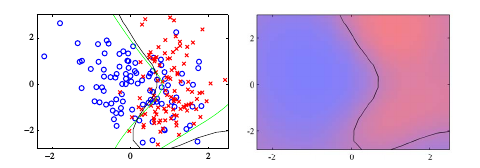

Fig.12 Illustration of the use of a Gaussian process for classiﬁcation, showing the data on the left together with the optimal decision boundary from the true distribution in green, and the decision boundary from the Gaussian process classiﬁer in black. On the right is the predicted posterior probability for the blue and red classes together with the Gaussian process decision boundary.

We are interested in evaluating the log-posterior function:

$$
\Psi(a_N) = \ln p(a_N | \theta) + \ln p(t_N | a_N)
$$

To compute the gradient of the log likelihood $ \ln p(t_N | \theta) $ with respect to the parameter vector $ \theta $, we need to consider the two sources of dependency on $ \theta $:
1. The dependence of the covariance matrix $ C_N $ on $ \theta $,
2. The dependence of $ a_N $ (the posterior mode) on $ \theta $.

The first term in the gradient arises from the dependence of the covariance matrix $ C_N $ on $ \theta $, and the second term arises from the dependence of $ a_N $ on $ \theta $. The gradient can be computed as follows.

### Gradient of $ \ln p(t_N | \theta) $

The gradient of the log-likelihood with respect to $ \theta_j $ is:

$$
\frac{\partial \ln p(t_N | \theta)}{\partial \theta_j} = \frac{1}{2} \left[ a_N^T C_N^{-1} a_N \frac{\partial C_N}{\partial \theta_j} - \text{Tr} \left( (I + C_N W_N) W_N^{-1} \frac{\partial C_N}{\partial \theta_j} \right) \right]
$$

### Gradient with Respect to $ a_N $

The second part of the gradient, which arises from the dependence of $ a_N $ on $ \theta $, can be computed by noting that the Laplace approximation ensures that the gradient of $ \Psi(a_N) $ vanishes at $ a_N = a_N^* $. Therefore, the derivative of $ \Psi(a_N) $ with respect to $ \theta_j $ simplifies to:

$$
\frac{\partial \ln | W_N + C_N^{-1} |}{\partial \theta_j} = - \frac{1}{2} \sum_{n=1}^N \frac{\partial a_N^*}{\partial \theta_j} \sigma_n^* (1 - \sigma_n^*) (1 - 2 \sigma_n^*) 
$$

where $ \sigma_n^* = \sigma(a_n^*) $ and $ \frac{\partial a_N^*}{\partial \theta_j} $ is the derivative of the posterior mode $ a_N^* $ with respect to $ \theta_j $, given by:

$$
\frac{\partial a_n^*}{\partial \theta_j} = (I + W_N C_N)^{-1} (t_N - \sigma_N) \frac{\partial C_N}{\partial \theta_j}
$$

### Final Gradient Expression

Combining these terms, the gradient of the log-likelihood function with respect to \( \theta_j \) is:

$$
\frac{\partial \ln p(t_N | \theta)}{\partial \theta_j} = \frac{1}{2} \left[ a_N^T C_N^{-1} a_N \frac{\partial C_N}{\partial \theta_j} - \text{Tr} \left( (I + C_N W_N) W_N^{-1} \frac{\partial C_N}{\partial \theta_j} \right) \right] - \frac{1}{2} \sum_{n=1}^N \frac{\partial a_n^*}{\partial \theta_j} \sigma_n^* (1 - \sigma_n^*) (1 - 2 \sigma_n^*)
$$

This expression can then be used with standard nonlinear optimization algorithms to find the optimal parameters $ \theta $.

### Example: Application to Gaussian Processes for Classification

The Laplace approximation can be applied to Gaussian processes for classification. For a synthetic two-class dataset, as shown in the figure, the optimal decision boundary from the true distribution is compared with the decision boundary from the Gaussian process classifier.

On the left, the data points are shown, with the true decision boundary (green) and the decision boundary from the Gaussian process classifier (black). On the right, the predicted posterior probabilities for the two classes are plotted, along with the Gaussian process decision boundary.



In [ ]:
import math

# Sigmoid function (logistic function)
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Squared Exponential Kernel (RBF Kernel)
def squared_exponential_kernel(x1, x2, length_scale):
    return math.exp(-0.5 * sum((a - b) ** 2 for a, b in zip(x1, x2)) / length_scale**2)

# Compute the covariance matrix for the dataset
def compute_covariance_matrix(X, length_scale):
    N = len(X)
    C = [[0.0 for _ in range(N)] for _ in range(N)]
    for i in range(N):
        for j in range(N):
            C[i][j] = squared_exponential_kernel(X[i], X[j], length_scale)
    return C

# Compute the gradient of the log-posterior
def compute_gradient(C, C_inv, W, a_N, t_N, sigma_N):
    N = len(t_N)
    gradient = [0.0 for _ in range(N)]
    
    for i in range(N):
        gradient[i] = t_N[i] - sigmoid(a_N[i]) - sum(C_inv[i][j] * a_N[j] for j in range(N))
        
    return gradient

# Compute the Hessian matrix (second derivatives of the log-posterior)
def compute_hessian(C, W):
    N = len(C)
    H = [[0.0 for _ in range(N)] for _ in range(N)]
    
    for i in range(N):
        for j in range(N):
            if i == j:
                H[i][j] = W[i][i] + C[i][i]
            else:
                H[i][j] = C[i][j]
    
    return H

# Solve a linear system using Gaussian elimination
def solve_system_of_equations(A, b):
    N = len(A)
    for i in range(N):
        # Find pivot element
        max_row = max(range(i, N), key=lambda r: abs(A[r][i]))
        A[i], A[max_row] = A[max_row], A[i]
        b[i], b[max_row] = b[max_row], b[i]
        
        for j in range(i + 1, N):
            factor = A[j][i] / A[i][i]
            for k in range(i, N):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]
    
    # Back substitution
    x = [0.0 for _ in range(N)]
    for i in range(N - 1, -1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i - 1, -1, -1):
            b[j] -= A[j][i] * x[i]
    
    return x

# Newton's method to find the posterior mode a_N*
def newton_method(C, C_inv, W, t_N, max_iter=100, tol=1e-6):
    N = len(t_N)
    a_N = [0.0 for _ in range(N)]  # Start with initial guess (a_N = 0)
    
    for _ in range(max_iter):
        sigma_N = [sigmoid(a) for a in a_N]
        
        gradient = compute_gradient(C, C_inv, W, a_N, t_N, sigma_N)
        H = compute_hessian(C, W)
        
        # Solve H * delta_a_N = gradient
        delta_a_N = solve_system_of_equations(H, gradient)
        
        # Update a_N
        a_N = [a - da for a, da in zip(a_N, delta_a_N)]
        
        # Check for convergence
        if all(abs(da) < tol for da in delta_a_N):
            break
    
    return a_N

# Main function to compute posterior mean and covariance using Laplace approximation
def laplace_approximation(X_train, t_train, X_test, length_scale, max_iter=100, tol=1e-6):
    # Step 1: Compute covariance matrix for training data
    C_train = compute_covariance_matrix(X_train, length_scale)
    C_train_inv = invert_matrix(C_train)  # You should implement this if not using numpy
    
    # Step 2: Use Newton's method to find the posterior mode a_N
    a_N_star = newton_method(C_train, C_train_inv, [], t_train)
    
    # Step 3: Compute the mean and covariance for the test set
    C_cross = [[squared_exponential_kernel(x_train, x_test, length_scale) for x_test in X_test] for x_train in X_train]
    k = [[squared_exponential_kernel(x_test, x_train, length_scale) for x_train in X_train] for x_test in X_test]
    
    mean = [sum(k_row[i] * a_N_star[i] for i in range(len(X_train))) for k_row in C_cross]
    
    return mean

# Example usage
X_train = [[0.1, 0.2], [0.4, 0.5], [0.6, 0.7]]  # Example training data
t_train = [0, 1, 0]  # Labels
X_test = [[0.2, 0.3], [0.5, 0.6]]  # Example test data
length_scale = 1.0  # Length scale for the kernel

mean = laplace_approximation(X_train, t_train, X_test, length_scale)
print("Posterior Mean:", mean)
